In [37]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import matplotlib.pyplot as plt
from random import *
import numpy as np

In [38]:
data_train =pd.read_csv('./data/fashion-mnist_train.csv',header=0)
data_train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# thay đổi shape của labels bằng reshape
# 60000 giá trị từ 0-9
#  (vì bước sau nhân ma trận 2 chiều nên phải là 2 chiều trong khi ban đầu là 1 chiều)
labels = data_train['label'].values.reshape(1,60000)
# transpose để hoán vị hàng cột, (60000,784) -> (784,60000)
train = data_train.drop('label',axis=1).values.transpose()

print(labels.shape)
# đưa giá trị pixels về 0-1 bằng cách chia cho 255 để giảm độ lớn của giá trị
train = np.array(train/255.0)
print(train.shape)

(1, 60000)
(784, 60000)


In [40]:
labels_ = np.zeros((60000,10))
labels_[np.arange(60000),labels] = 1
# print(labels_)

# 60000,10 -> 10,60000
labels_ = labels_.transpose()
labels_ = np.array(labels_)
print(labels_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [41]:
n_dim = 784

tf.reset_default_graph()
n1 = 5 # số lượng neural ở layer 1
n2 = 10 # số lượng neural ở layer output
# y = f(x) = Wx + b
cost_history = np.empty(shape=[1],dtype=float)
# print(cost_history)
learning_rate = tf.placeholder(tf.float32,shape=())
X = tf.placeholder(tf.float32,[n_dim,None]) # 784,
Y = tf.placeholder(tf.float32,[n2,None]) # 10,

W1 = tf.Variable(tf.truncated_normal([n1,n_dim],stddev=0.1)) # 5,784
b1 = tf.Variable(tf.zeros([n1,1])) # 5,1  bias
W2 = tf.Variable(tf.truncated_normal([n2,n1],stddev=0.1)) # 10,5
b2 = tf.Variable(tf.zeros([n2,1])) # 10,1  bias
Z1 = tf.nn.relu(tf.matmul(W1,X)+b1) # 5,784 * 784,1 + 5,1 = 5,1
Z2 = tf.nn.relu(tf.matmul(W2,Z1) + b2) # 10,5 * 5,1 + 10,1 = 10,1
y_ = tf.nn.softmax(Z2,0) # 10,1
cost = - tf.reduce_mean(Y* tf.log(y_) + (1-Y)*tf.log(1-y_)) # as the loss function
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [45]:
sess = tf.Session()
sess.run(init)

training_epochs = 100

for epoch in range(training_epochs+1):
    sess.run(optimizer,feed_dict={X:train,Y:labels_,learning_rate:0.001})
    cost_ = sess.run(cost,feed_dict={X:train,Y:labels_})
    cost_history = np.append(cost_history,cost_)
    if epoch % 20 == 0:
        print('Epoch: ',epoch,' cost: ',cost_)

correct_predictions = tf.equal(tf.argmax(y_,0),tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))
print('Accuracy: ',accuracy.eval({X:train,Y:labels_,learning_rate:0.001},session=sess))

Epoch:  0  cost:  0.32304573
Epoch:  20  cost:  0.30922234
Epoch:  40  cost:  0.2896137
Epoch:  60  cost:  0.2659198
Epoch:  80  cost:  0.24174102
Epoch:  100  cost:  0.2206525
Accuracy:  0.52305


In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


x = tf.constant([[1.,1.,1],[2.,2.,2.]],dtype=tf.float32)

y = tf.reduce_mean(x,0)

sess = tf.Session()
sess.run(y)

array([1.5, 1.5, 1.5], dtype=float32)

In [9]:
import numpy as np

x = [[1.,1.,1.],[2.,2.,2.]]

print(np.mean(x,0))

[1.5 1.5 1.5]


In [7]:
c = np.array([[3.,4], [5.,6], [6.,7]])
print(np.mean(c,1))

Mean = tf.reduce_mean(c,1)
with tf.Session() as sess:
    result = sess.run(Mean)
    print(result)

[3.5 5.5 6.5]
[3.5 5.5 6.5]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train = pd.read_csv('./data/fashion-mnist_train.csv',header=0)

labels = train['label'].values.reshape(1,60000)
train = train.drop('label',axis=1).values.transpose()
train = np.array(train/255.0)
labels_ = np.zeros((60000,10))
labels_[np.arange(60000),labels] = 1

labels_ = labels_.transpose()
labels_ = np.array(labels_)


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()
n_dim = 784 # 28*28
n1 = 5 # số lượng neural ở layer 1
n2 = 32 # số lượng neural ở layer 2
n3 = 10 # số lượng neural ở layer output
cost_history = np.empty(shape=[1],dtype=float)

learning_rate = tf.placeholder(tf.float32,shape=())

X = tf.placeholder(tf.float32,[n_dim,None])
Y = tf.placeholder(tf.float32,[n3,None])
# standard deviation = 0.1
# stddev = 0.1 
# độ lệch chuẩn = 0.1 bởi vì khi tính toán giá trị của z1 ứng với neural 1, z2, z3 thì giá trị của nó sẽ rất lớn
# khi z1 rất lớn thì hàm relu của python sẽ có khả năng trả về trá trị NaN
W1 = tf.Variable(tf.truncated_normal([n1,n_dim],stddev=0.1,mean=0)) # 5,784
b1 = tf.Variable(tf.zeros([n1,1])) # 5,1  bias
W2 = tf.Variable(tf.truncated_normal([n2,n1],stddev=0.1)) # 32,5
b2 = tf.Variable(tf.zeros([n2,1])) # 32,1  bias
W3 = tf.Variable(tf.truncated_normal([n3,n2],stddev=0.1)) # 10,32
b3 = tf.Variable(tf.zeros([n3,1])) # 10,1  bias

Z1 = tf.nn.relu(tf.matmul(W1,X) + b1) 
Z2 = tf.nn.relu(tf.matmul(W2,Z1) + b2)
Z3 = tf.nn.relu(tf.matmul(W3,Z2) + b3)

y_ = tf.nn.softmax(Z3,0) # 10,1
cost = - tf.reduce_mean(Y* tf.log(y_) + (1-Y)*tf.log(1-y_)) # as the loss function

optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

# epochs = 100
# for i in range(epochs+1):
#     sess.run(optimizer,feed_dict={X:train,Y:labels_,learning_rate:0.001})
#     cost_ = sess.run(cost,feed_dict={X:train,Y:labels_})
#     cost_history= np.append(cost_history,cost_)
#     if i % 20 == 0:        
#         print('Epoch: ',i,' cost: ',cost_)
        
# correct_predictions = tf.equal(tf.argmax(y_,0),tf.argmax(Y,0))
# accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))
# print("accuracy: ",accuracy.eval({X:train,Y:labels_,learning_rate:0.001},session=sess))
epochs = 20
minibatch_size = 1
for i in range(epochs+1):
    for j in range(0, train.shape[1],minibatch_size):
        X_train_mini = train[:,j:j+minibatch_size] # 784,1
        Y_train_mini = labels_[:,j:j+minibatch_size]
        sess.run(optimizer,feed_dict={X:X_train_mini,Y:Y_train_mini,learning_rate:0.0001})
    
    cost_ = sess.run(cost,feed_dict={X:train,Y:labels_,learning_rate:0.0001})
    cost_history = np.append(cost_history,cost_)
    if (i % 1 == 0):
        print('Epoch: ',i,' cost: ',cost_)

correct_predictions = tf.equal(tf.argmax(y_,0),tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))
print("accuracy: ",accuracy.eval({X:train,Y:labels_,learning_rate:0.0001},session=sess))

Instructions for updating:
non-resource variables are not supported in the long term
Epoch:  0  cost:  0.32465288
Epoch:  1  cost:  0.32404456
Epoch:  2  cost:  0.32319567
Epoch:  3  cost:  0.32189497
Epoch:  4  cost:  0.31986782
Epoch:  5  cost:  0.31679794
Epoch:  6  cost:  0.31230322
Epoch:  7  cost:  0.3062158
Epoch:  8  cost:  0.29932025
Epoch:  9  cost:  0.29258546
Epoch:  10  cost:  0.2858809
Epoch:  11  cost:  0.27882162
Epoch:  12  cost:  0.2717027
Epoch:  13  cost:  0.26478723
Epoch:  14  cost:  0.25779855
Epoch:  15  cost:  0.25063682
Epoch:  16  cost:  0.24365921
Epoch:  17  cost:  0.23733586
Epoch:  18  cost:  0.23200274
Epoch:  19  cost:  0.22769968
Epoch:  20  cost:  0.2242574
accuracy:  0.46853334


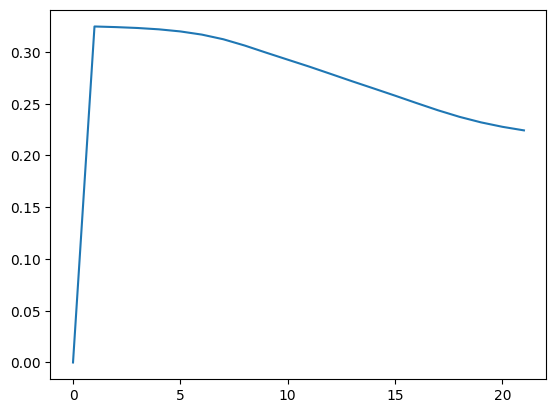

In [2]:
plt.plot(cost_history)
plt.show()

In [12]:
epochs = 100
minibatch_size = 3000
for i in range(epochs+1):
    for j in range(0, train.shape[1],minibatch_size):
        X_train_mini = train[:,j:j+minibatch_size] # 784,3000
        Y_train_mini = labels_[:,j:j+minibatch_size]
        sess.run(optimizer,feed_dict={X:X_train_mini,Y:Y_train_mini,learning_rate:0.001})
    
    cost_ = sess.run(cost,feed_dict={X:train,Y:labels_,learning_rate:0.001})
    cost_history = np.append(cost_history,cost_)
    if (i % 50 == 0):
        print('Epoch: ',i,' cost: ',cost_)

correct_predictions = tf.equal(tf.argmax(y_,0),tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))
print("accuracy: ",accuracy.eval({X:train,Y:labels_,learning_rate:0.001},session=sess))

Epoch:  0  cost:  0.31971088
Epoch:  50  cost:  nan
Epoch:  100  cost:  nan
accuracy:  0.1


In [2]:
import numpy as np

a1 = np.array([[1,2,3],[4,5,6]])

print(a1)

[[1 2 3]
 [4 5 6]]


In [6]:
a2 = np.zeros([10])
print(a2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
arr2 = np.array(([(2,4,0,6), (4,7,5,6)],
                 [(0,3,2,1), (9,4,5,6)],
                 [(5,8,6,4), (1,4,6,8)]), dtype = int)

print(arr2)

[[[2 4 0 6]
  [4 7 5 6]]

 [[0 3 2 1]
  [9 4 5 6]]

 [[5 8 6 4]
  [1 4 6 8]]]
